In [152]:
from queue import PriorityQueue as queue
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [153]:
class Point:
    def __init__(self, x, y, cluster):
        self.x = np.array([x, y])
        self.cluster = cluster
        self.label = None
        self.distance = None
        self.visited = False
    def __lt__(self, other):
        return self.distance < other.distance

In [154]:
def euclidean(p, q):
    return np.linalg.norm(p.x - q.x)

In [155]:
def get_neighbours(db, q, eps, dist_func=euclidean):
    N = set([])
    for p in db:
        if dist_func(q, p) <= eps:
            N.add(p)
    return N

In [156]:
def core_distance(N, p, eps, min_pts, tol=1e-5, dist_func=euclidean):
    if len(N) < min_pts: return
    ordered = sorted(N, key=lambda x: dist_func(x, p))
    return dist_func(ordered[min_pts-1], p)

In [157]:
def update(N, p, S, eps, min_pts, dist_func=euclidean):
    core_dist = core_distance(N, p, eps, min_pts)
    for o in N:
        if not o.visited:
            new_reach_dist = max(core_dist, dist_func(p, o))
            if o.distance == None:
                o.distance = new_reach_dist
                S.put(o)
            else:
                if new_reach_dist < o.distance:
                    o.distance = new_reach_dist
                    S.put(o)

In [158]:
def optics(db, eps, min_pts):
    ordered_list = []
    pbar = tqdm(total=len(db))
    for p in db:
        if not p.visited:
            N = get_neighbours(db, p, eps)
            p.visited = True
            ordered_list.append(p)
            pbar.update(1)
            if core_distance(N, p, eps, min_pts) != None:
                S = queue()
                update(N, p, S, eps, min_pts)
                while not S.empty():
                    q = S.get()
                    if q.visited: continue
                    Ns = get_neighbours(db, q, eps)
                    q.visited = True
                    ordered_list.append(q)
                    pbar.update(1)
                    if core_distance(Ns, q, eps, min_pts) != None:
                        update(Ns, q, S, eps, min_pts)
    return ordered_list            

In [159]:
def plot_clusters(db):
   # TODO
    pass

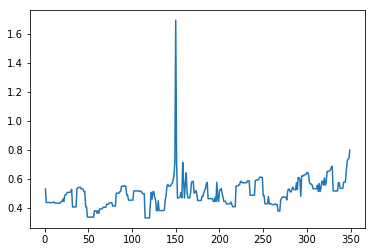

In [160]:
df = pd.read_excel('data1.xlsx')
db = np.array([Point(p[0], p[1], None) for p in df.values])
eps = 5
min_pts = 10
ordered_list = optics(db, eps, min_pts)
xs = [i for i in range(len(ordered_list))]
ys = [p.distance for p in ordered_list]
plt.plot(xs, ys)
plt.show()

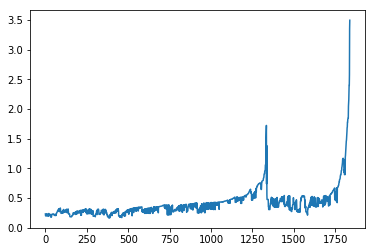

In [161]:
df = pd.read_excel('data2.xlsx')
db = np.array([Point(p[0], p[1], None) for p in df.values])
eps = 5
min_pts = 10
ordered_list = optics(db, eps, min_pts)
xs = [i for i in range(len(ordered_list))]
ys = [p.distance for p in ordered_list]
plt.plot(xs, ys)
plt.show()